In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

x_train = pd.read_csv('/content/drive/MyDrive/aml/Oversampled_X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/aml/Oversampled_y_train.csv')

x_val = pd.read_csv('/content/drive/MyDrive/aml/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/aml/y_val.csv')

x_test = pd.read_csv('/content/drive/MyDrive/aml/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/aml/y_test.csv')

In [ ]:
!pip install catboost

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2]
}

cat_model = CatBoostClassifier(verbose=0, random_state=42)

grid_search_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1
)

grid_search_cat.fit(x_train, y_train.values.ravel())

best_cat_model = grid_search_cat.best_estimator_
print("Best CatBoost Parameters:", grid_search_cat.best_params_)

Best CatBoost Parameters: {'learning_rate': 0.2}


Best Hyperparameters: {'learning_rate': 0.2}
Best Cross-Validation Score: 0.9997
Train Set Accuracy: 1.0000
Test Set Accuracy: 0.8088
Classification Report (Test Set):
              precision    recall  f1-score   support

         Dos       0.97      0.85      0.91      7459
       Probe       0.74      0.72      0.73      2421
         R2L       0.95      0.22      0.35      2885
         U2R       0.30      0.48      0.37        67
      normal       0.74      0.97      0.84      9711

    accuracy                           0.81     22543
   macro avg       0.74      0.65      0.64     22543
weighted avg       0.84      0.81      0.79     22543



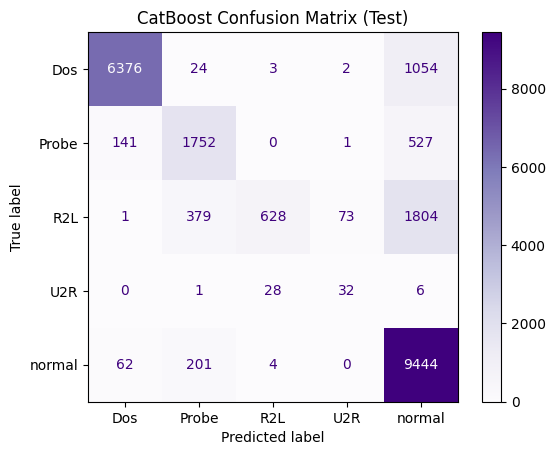

In [ ]:
y_train_pred = best_cat_model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

y_test_pred = best_cat_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

best_params = grid_search_cat.best_params_
best_score = grid_search_cat.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Train Set Accuracy: {accuracy_train:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Purples')
plt.title("CatBoost Confusion Matrix (Test)")
plt.grid(False)
plt.show()



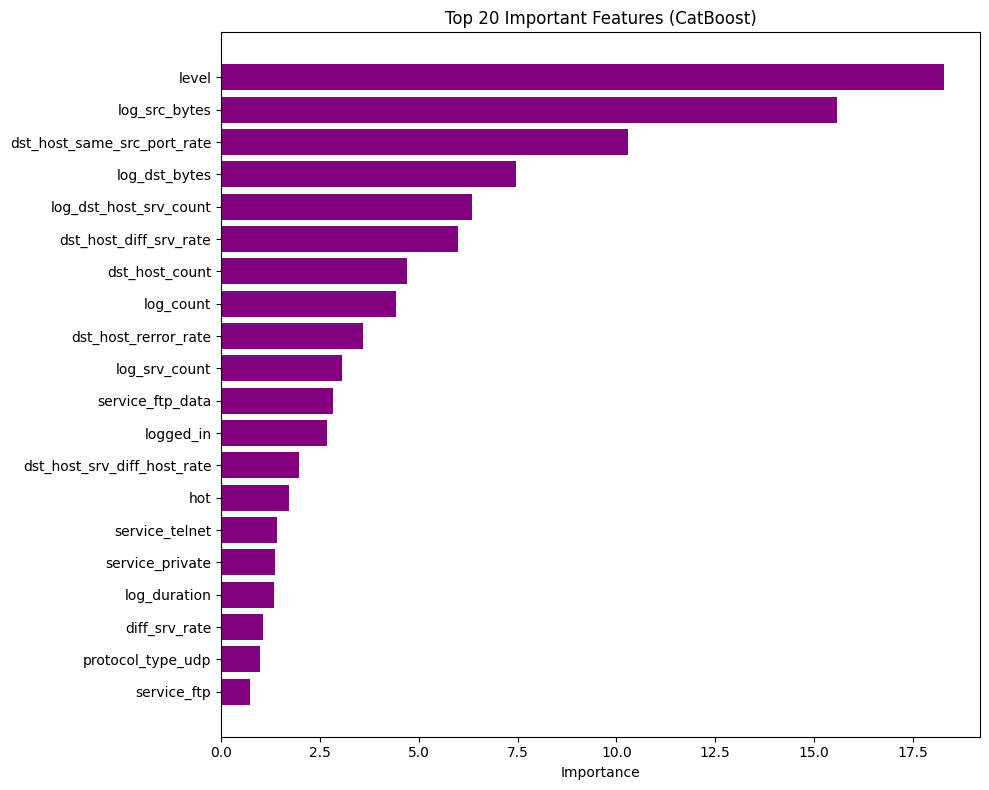

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = best_cat_model.get_feature_importance()
features = np.array(x_train.columns)

top_n = 20
indices = np.argsort(importances)[::-1][:top_n]
top_features = features[indices]
top_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.barh(range(top_n), top_importances[::-1], color='purple')
plt.yticks(range(top_n), top_features[::-1], fontsize=10)
plt.xlabel("Importance")
plt.title("Top 20 Important Features (CatBoost)")
plt.tight_layout()
plt.show()
